We are looking at the 2012 Election Pooling data.This was a contest between Obama ans Romney.We know in the Hindsight that the election was won by Obama.Lets look at the data and see if there were signs of Obama victory in this pre poll survey.This Kernel is work in process.If you like my work please do vote.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/2012-election-obama-vs-romney/Election_Donor_Data.csv
/kaggle/input/2012-election-obama-vs-romney/2012-general-election-romney-vs-obama.csv
/kaggle/input/obama-yes-we-can/We_Can.jpg


**Importing Python Modules**

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
from pandas import Series,DataFrame
import warnings
import seaborn as sns
warnings.filterwarnings('ignore') 

**Obama:** was the first African American to become the Presedent of United States.He belongs to the Democratic Party.He took over the Presidency from George W Bush in the year 2008.Obama Steered US economy through the 2008 financial crisis.He will be remembered for his great Oratory Skills.His sense of humor and Human touch made him popular US president.

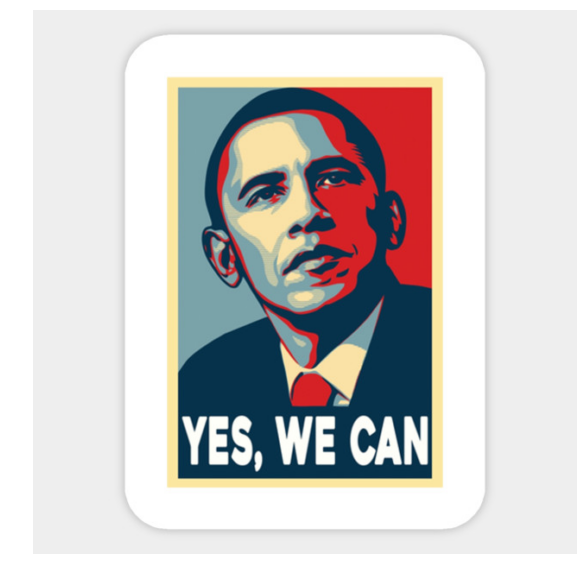

In [3]:
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
import numpy as np
img=np.array(Image.open('../input/obama-yes-we-can/We_Can.jpg'))
fig=plt.figure(figsize=(10,10))
plt.imshow(img,interpolation='bilinear')
plt.axis('off')
plt.show()

**Importing the dataset**

In [4]:
df=pd.read_csv('../input/2012-election-obama-vs-romney/2012-general-election-romney-vs-obama.csv')
df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 17 columns):
Pollster                  590 non-null object
Start Date                590 non-null object
End Date                  590 non-null object
Entry Date/Time (ET)      590 non-null object
Number of Observations    568 non-null float64
Population                590 non-null object
Mode                      590 non-null object
Obama                     590 non-null float64
Romney                    590 non-null float64
Undecided                 423 non-null float64
Other                     202 non-null float64
Pollster URL              590 non-null object
Source URL                588 non-null object
Partisan                  590 non-null object
Affiliation               590 non-null object
Question Text             0 non-null float64
Question Iteration        590 non-null int64
dtypes: float64(6), int64(1), object(10)
memory usage: 78.5+ KB


**Summary of Dataset**

In [6]:
print('Rows     :',df.shape[0])
print('Columns  :',df.shape[1])
print('\nFeatures :\n     :',df.columns.tolist())
print('\nMissing values    :',df.isnull().values.sum())
print('\nUnique values :  \n',df.nunique())

Rows     : 590
Columns  : 17

Features :
     : ['Pollster', 'Start Date', 'End Date', 'Entry Date/Time (ET)', 'Number of Observations', 'Population', 'Mode', 'Obama', 'Romney', 'Undecided', 'Other', 'Pollster URL', 'Source URL', 'Partisan', 'Affiliation', 'Question Text', 'Question Iteration']

Missing values    : 1169

Unique values :  
 Pollster                   62
Start Date                361
End Date                  353
Entry Date/Time (ET)      590
Number of Observations    229
Population                  4
Mode                        5
Obama                      18
Romney                     20
Undecided                  21
Other                      15
Pollster URL              590
Source URL                442
Partisan                    3
Affiliation                 4
Question Text               0
Question Iteration          1
dtype: int64


**What are modes of Survey?**

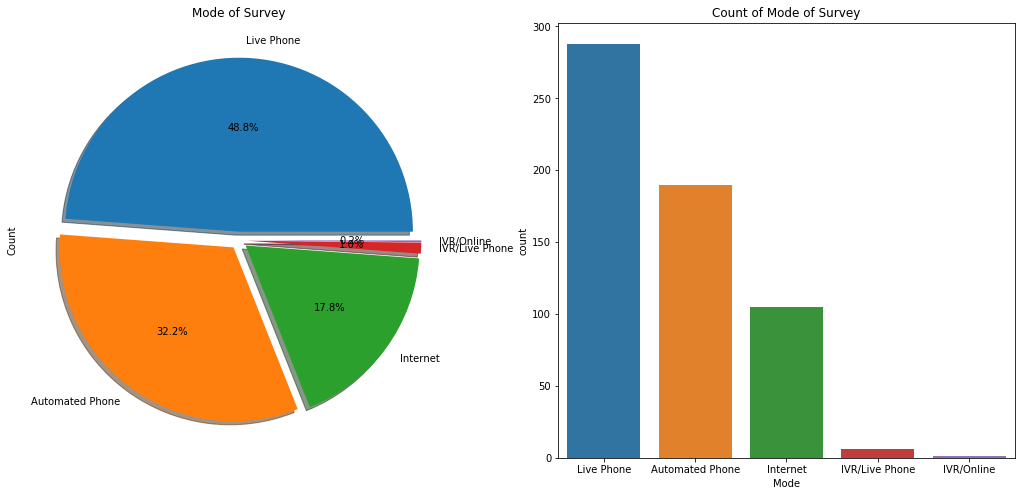

In [7]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Mode'].value_counts().plot.pie(explode=[0.05,0.05,0.05,0.05,0.05],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Mode of Survey')
ax[0].set_ylabel('Count')
sns.countplot('Mode',data=df,ax=ax[1],order=df['Mode'].value_counts().index)
ax[1].set_title('Count of Mode of Survey')
plt.show()

There are 5 modes of conducting the surevey Live Phone,Automated Phone,Internet Mode, IVR/Live Phone and IVR/Online

**What Types of Survey?**

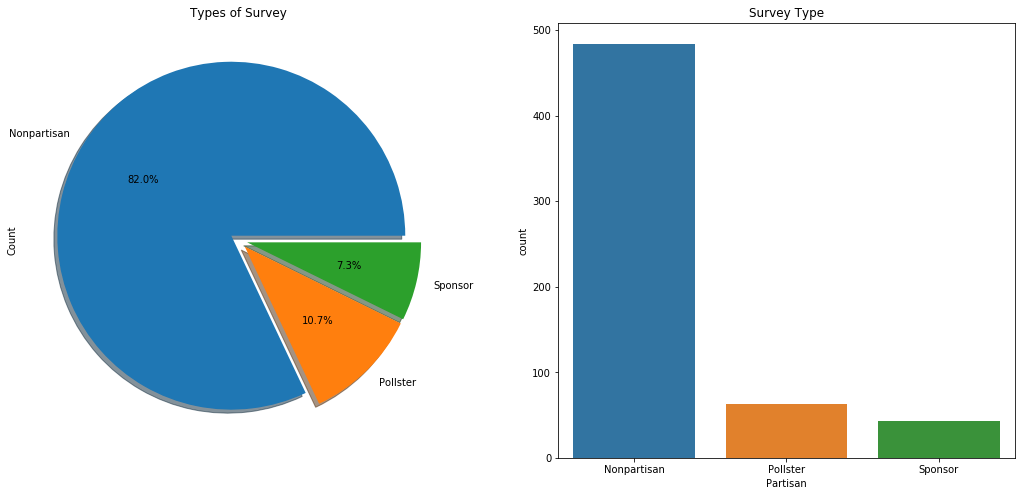

In [8]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Partisan'].value_counts().plot.pie(explode=[0.05,0.05,0.05],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Types of Survey')
ax[0].set_ylabel('Count')
sns.countplot('Partisan',data=df,ax=ax[1],order=df['Partisan'].value_counts().index)
ax[1].set_title('Survey Type')
plt.show()

So most surveys are conducted by Non Partisan people.Very few of the survey are sponsored by political parties

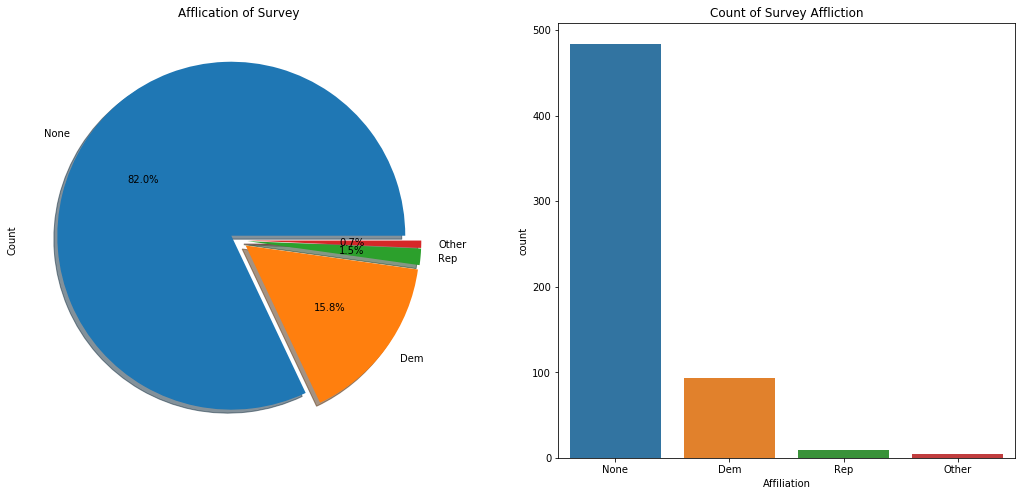

In [9]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Affiliation'].value_counts().plot.pie(explode=[0.05,0.05,0.05,0.05],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Afflication of Survey')
ax[0].set_ylabel('Count')
sns.countplot('Affiliation',data=df,ax=ax[1],order=df['Affiliation'].value_counts().index)
ax[1].set_title('Count of Survey Affliction')
plt.show()

Maximum Surveys have no afflications. 15.8% affliction with Democrats and 1.5% affliction with Repiblicans.

**Population Consists of whom?**

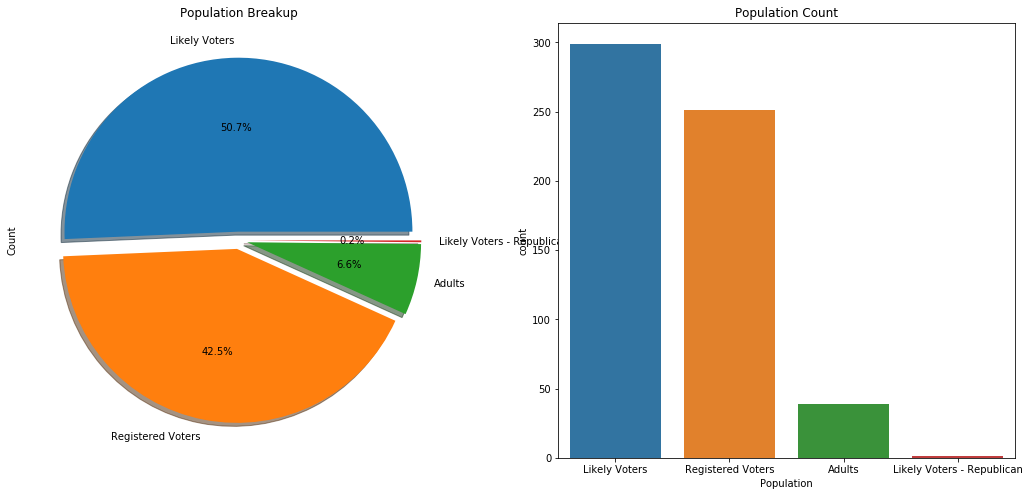

In [10]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Population'].value_counts().plot.pie(explode=[0.05,0.05,0.05,0.05],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Population Breakup')
ax[0].set_ylabel('Count')
sns.countplot('Population',data=df,ax=ax[1],order=df['Population'].value_counts().index)
ax[1].set_title('Population Count')
plt.show()

Four types of people in the data are Likely Voters,Registered Voters,Adults & Likely Voters-Rebublican

**Factor Plot of Afflication based on Population**

In [11]:
#sns.factorplot('Population',data=df,hue='Population')
#plt.ioff()

**How Obama and Romney pitch against each other?**

In [12]:
df.mean()

Number of Observations    1295.390845
Obama                       46.774576
Romney                      44.572881
Undecided                    6.546099
Other                        3.400990
Question Text                     NaN
Question Iteration           1.000000
dtype: float64

In [13]:
avg=pd.DataFrame(df.mean())
avg

,0
Number of Observations,1295.390845
Obama,46.774576
Romney,44.572881
Undecided,6.546099
Other,3.400990
Question Text,NaN
Question Iteration,1.000000


In [14]:
avg.drop('Number of Observations',axis=0,inplace=True)

In [15]:
std=pd.DataFrame(df.std())
std.drop('Number of Observations',axis=0,inplace=True)

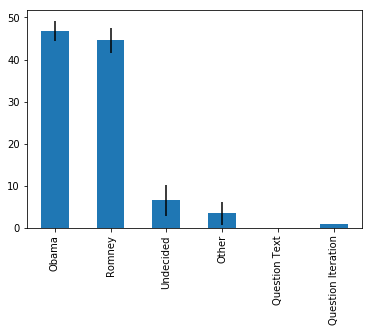

In [16]:
avg.plot(yerr=std,kind='bar',legend=False)
plt.ioff()

We have considered the Average of percentage people in favor of candidates.But we did consider the inpact of standard deviation.With standard deviation we can see that Obama and Romney overlap with eachother.

In [17]:
poll_avg=pd.concat([avg,std],axis=1)
poll_avg

,0,0
Obama,46.774576,2.447069
Romney,44.572881,2.925320
Undecided,6.546099,3.698614
Other,3.400990,2.721318
Question Text,NaN,NaN
Question Iteration,1.000000,0.000000


In [18]:
poll_avg.columns=['Average','STD']
poll_avg

,Average,STD
Obama,46.774576,2.447069
Romney,44.572881,2.925320
Undecided,6.546099,3.698614
Other,3.400990,2.721318
Question Text,NaN,NaN
Question Iteration,1.000000,0.000000


**How Romney Fares Against Obama as time went one ?**

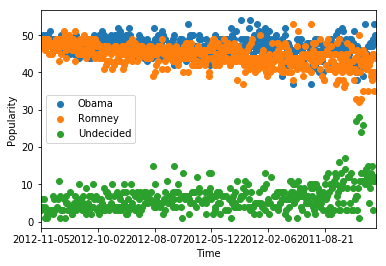

In [19]:
df.plot(x='End Date',y=['Obama','Romney','Undecided'],linestyle='',marker='o')
plt.xlabel('Time')
plt.ylabel('Popularity')
plt.ioff()

Time is increasing from Right to Left.We can see that the percentage of voters in favor of Romney started increasing and the gap closed as the campaign continued.Undecided voter finally decide the outcome of the election.

In [20]:
from datetime import datetime

In [21]:
df['Difference']=(df.Obama-df.Romney)
df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Difference
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1,0.0
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1,2.0
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1,0.0
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1,1.0
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1,-1.0


In [22]:
df.columns

Index(['Pollster', 'Start Date', 'End Date', 'Entry Date/Time (ET)',
       'Number of Observations', 'Population', 'Mode', 'Obama', 'Romney',
       'Undecided', 'Other', 'Pollster URL', 'Source URL', 'Partisan',
       'Affiliation', 'Question Text', 'Question Iteration', 'Difference'],
      dtype='object')

In [23]:
df=df.groupby(['Start Date'],as_index=False).mean()
df.head()

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Difference
0,2009-03-13,1403.0,44.0,44.0,12.0,NaN,NaN,1,0.0
1,2009-04-17,686.0,50.0,39.0,11.0,NaN,NaN,1,11.0
2,2009-05-14,1000.0,53.0,35.0,12.0,NaN,NaN,1,18.0
3,2009-06-12,638.0,48.0,40.0,12.0,NaN,NaN,1,8.0
4,2009-07-15,577.0,49.0,40.0,11.0,NaN,NaN,1,9.0


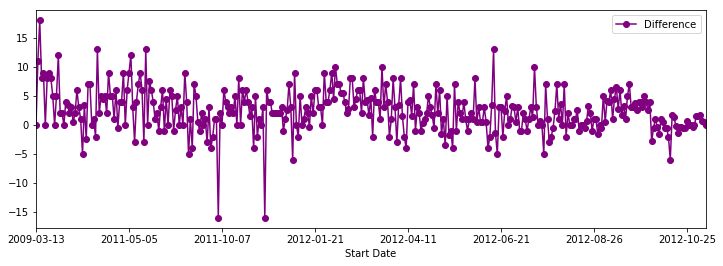

In [24]:
df.plot('Start Date','Difference',figsize=(12,4),marker='o',linestyle='-',color='purple')
plt.ioff()

If the Difference is positive it means that Obama is leading and if the Difference is Negative it means Romney is leading.In the initial Phase Obama had more lead over RomneyWe can sse as we move from Mar 2019 to Oct-2012 the gap between Obama and Romney reduced.

In [25]:
 df.loc[df['Difference'].idxmin()]

Start Date                2011-10-05
Number of Observations           602
Obama                             37
Romney                            53
Undecided                         10
Other                            NaN
Question Text                    NaN
Question Iteration                 1
Difference                       -16
Name: 98, dtype: object

Using the above method we can find out the day on which the Difference was more in favor of Romney.By Checking news of the day we can find out what was the reason for sudden Popularity increase of Mit Romney.

In [26]:
row_in=0
xlimit=[]

for date in df['Start Date']:
    if date[0:7]=='2011-10':
        xlimit.append(row_in)
        row_in+=1
    else:
        row_in+=1
print(min(xlimit))
print(max(xlimit))      

96
110


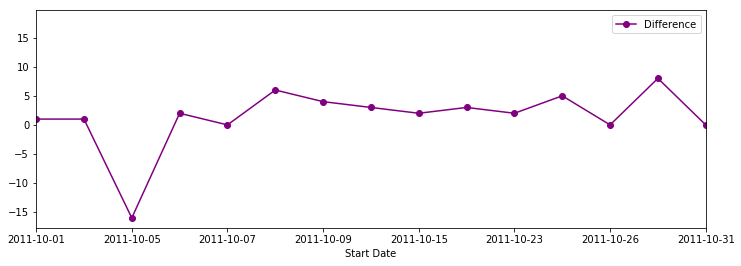

In [27]:
df.plot('Start Date','Difference',figsize=(12,4),marker='o',linestyle='-',color='purple',xlim=(96,110))
plt.ioff()

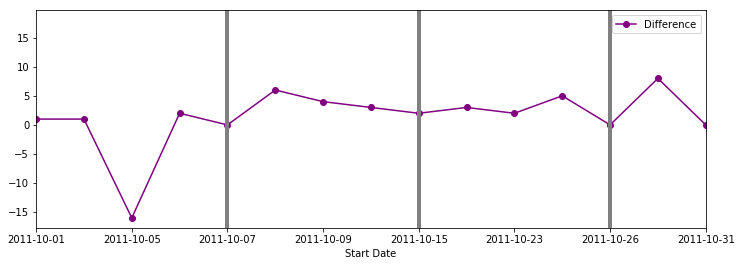

In [28]:
df.plot('Start Date','Difference',figsize=(12,4),marker='o',linestyle='-',color='purple',xlim=(96,110))
# Oct 3rd
plt.axvline(x=96+4,linewidth=4,color='grey')
#Oct 11th
plt.axvline(x=96+8,linewidth=4,color='grey')
#Oct 22nd           
plt.axvline(x=96+12,linewidth=4,color='grey')
plt.ioff()

**Lets Analyse Donar Data**

In [29]:
dd=pd.read_csv('../input/2012-election-obama-vs-romney/Election_Donor_Data.csv')
dd.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [30]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 122.3+ MB


**Summary of Data**

In [31]:
print('Rows     :',dd.shape[0])
print('Columns  :',dd.shape[1])
print('\nFeatures :\n     :',dd.columns.tolist())
print('\nMissing values    :',dd.isnull().values.sum())
print('\nUnique values :  \n',dd.nunique())

Rows     : 1001731
Columns  : 16

Features :
     : ['cmte_id', 'cand_id', 'cand_nm', 'contbr_nm', 'contbr_city', 'contbr_st', 'contbr_zip', 'contbr_employer', 'contbr_occupation', 'contb_receipt_amt', 'contb_receipt_dt', 'receipt_desc', 'memo_cd', 'memo_text', 'form_tp', 'file_num']

Missing values    : 2823068

Unique values :  
 cmte_id                  14
cand_id                  13
cand_nm                  13
contbr_nm            364681
contbr_city           14679
contbr_st                74
contbr_zip           308708
contbr_employer      135650
contbr_occupation     45073
contb_receipt_amt      8079
contb_receipt_dt        466
receipt_desc             58
memo_cd                   1
memo_text               757
form_tp                   3
file_num                 80
dtype: int64


In [32]:
dd['contb_receipt_amt'].value_counts()

100.00    178188
50.00     137584
25.00     110345
250.00     91182
500.00     57984
           ...  
97.15          1
122.32         1
188.65         1
122.40         1
132.12         1
Name: contb_receipt_amt, Length: 8079, dtype: int64

Most common Donation is 100$

In [33]:
dd_mean=dd['contb_receipt_amt'].mean()
dd_std=dd['contb_receipt_amt'].std()
print('The average donation was %.2f with a std %.2f'%(dd_mean,dd_std))

The average donation was 298.24 with a std 3749.67


So the average donation is 298 $ but the standard deviation is very high.This means there are people who have made big contribution.

In [34]:
top_donor=dd['contb_receipt_amt'].copy()
top_donor.sort_values

<bound method Series.sort_values of 0           250.0
1            50.0
2           250.0
3           250.0
4           300.0
            ...  
1001726    5000.0
1001727    2500.0
1001728     500.0
1001729     500.0
1001730    2500.0
Name: contb_receipt_amt, Length: 1001731, dtype: float64>

There are some negative value sowe have to remove them 

In [35]:
top_donor=top_donor[top_donor>0]
top_donor.sort_values(ascending=False).head()

325136    2014490.51
326651    1944042.43
344539    1679114.65
344419    1511192.17
319478     526246.17
Name: contb_receipt_amt, dtype: float64

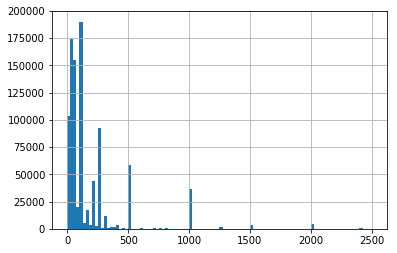

In [36]:
com_don=top_donor[top_donor<2500]
com_don.hist(bins=100,range=[0, 2500])
plt.ioff()

So most donations are less than 1000 $

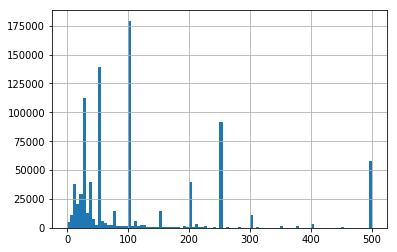

In [37]:
com_don=top_donor[top_donor<2500]
com_don.hist(bins=100,range=[0, 500])
plt.ioff()

100 $ is the most contributed amount towards donation

In [38]:
dd.columns

Index(['cmte_id', 'cand_id', 'cand_nm', 'contbr_nm', 'contbr_city',
       'contbr_st', 'contbr_zip', 'contbr_employer', 'contbr_occupation',
       'contb_receipt_amt', 'contb_receipt_dt', 'receipt_desc', 'memo_cd',
       'memo_text', 'form_tp', 'file_num'],
      dtype='object')

In [39]:
dd.cand_nm.unique()

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

**Dictionary of Afflication**

In [40]:
party_map={'Bachmann, Michelle':'Republican', 'Romney, Mitt':'Republican', 'Obama, Barack':'Democratic',
       "Roemer, Charles E. 'Buddy' III":'Republican', 'Pawlenty, Timothy':'Republican',
       'Johnson, Gary Earl':'Republican', 'Paul, Ron':'Republican', 'Santorum, Rick':'Republican',
       'Cain, Herman':'Republican', 'Gingrich, Newt':'Republican', 'McCotter, Thaddeus G':'Republican',
       'Huntsman, Jon':'Republican', 'Perry, Rick':'Republican'}

In [41]:
dd['Party']=dd.cand_nm.map(party_map)

In [42]:
dd.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [43]:
dd=dd[dd.contb_receipt_amt>0]

In [44]:
dd.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [45]:
dd.groupby('cand_nm')['contb_receipt_amt'].count()

cand_nm
Bachmann, Michelle                 13082
Cain, Herman                       20052
Gingrich, Newt                     46883
Huntsman, Jon                       4066
Johnson, Gary Earl                  1234
McCotter, Thaddeus G                  73
Obama, Barack                     589127
Paul, Ron                         143161
Pawlenty, Timothy                   3844
Perry, Rick                        12709
Roemer, Charles E. 'Buddy' III      5844
Romney, Mitt                      105155
Santorum, Rick                     46245
Name: contb_receipt_amt, dtype: int64

In [46]:
dd.groupby('cand_nm')['contb_receipt_amt'].sum()

cand_nm
Bachmann, Michelle                2.711439e+06
Cain, Herman                      7.101082e+06
Gingrich, Newt                    1.283277e+07
Huntsman, Jon                     3.330373e+06
Johnson, Gary Earl                5.669616e+05
McCotter, Thaddeus G              3.903000e+04
Obama, Barack                     1.358774e+08
Paul, Ron                         2.100962e+07
Pawlenty, Timothy                 6.004819e+06
Perry, Rick                       2.030575e+07
Roemer, Charles E. 'Buddy' III    3.730099e+05
Romney, Mitt                      8.833591e+07
Santorum, Rick                    1.104316e+07
Name: contb_receipt_amt, dtype: float64

In [47]:
dd.groupby('cand_nm')['contb_receipt_amt'].mean()

cand_nm
Bachmann, Michelle                 207.264890
Cain, Herman                       354.133348
Gingrich, Newt                     273.719039
Huntsman, Jon                      819.078574
Johnson, Gary Earl                 459.450243
McCotter, Thaddeus G               534.657534
Obama, Barack                      230.641996
Paul, Ron                          146.755191
Pawlenty, Timothy                 1562.127856
Perry, Rick                       1597.746007
Roemer, Charles E. 'Buddy' III      63.827841
Romney, Mitt                       840.054277
Santorum, Rick                     238.796828
Name: contb_receipt_amt, dtype: float64

We can see that highest number of people contributed to Obama (589127 Nos)

Obama received the highest contribution $ 1.358774e+08

Perry Rich has a mean contribution of $ 1597.746007 which is very high compared to Obama who got  230.641996

In [48]:
cand_amount=dd.groupby('cand_nm')['contb_receipt_amt'].sum()

i=0

for don in cand_amount:
    print('The candidate %s raise %.0f dollars'%(cand_amount.index[i],don))
    print('\n')
    i+=1

The candidate Bachmann, Michelle raise 2711439 dollars


The candidate Cain, Herman raise 7101082 dollars


The candidate Gingrich, Newt raise 12832770 dollars


The candidate Huntsman, Jon raise 3330373 dollars


The candidate Johnson, Gary Earl raise 566962 dollars


The candidate McCotter, Thaddeus G raise 39030 dollars


The candidate Obama, Barack raise 135877427 dollars


The candidate Paul, Ron raise 21009620 dollars


The candidate Pawlenty, Timothy raise 6004819 dollars


The candidate Perry, Rick raise 20305754 dollars


The candidate Roemer, Charles E. 'Buddy' III raise 373010 dollars


The candidate Romney, Mitt raise 88335908 dollars


The candidate Santorum, Rick raise 11043159 dollars




**Which Candidate got More Contribution?**

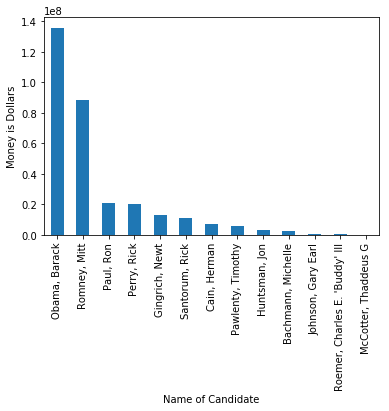

In [49]:
cand_amount.sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Name of Candidate')
plt.ylabel('Money is Dollars')
plt.ioff()

**Which Party got more contribution?**

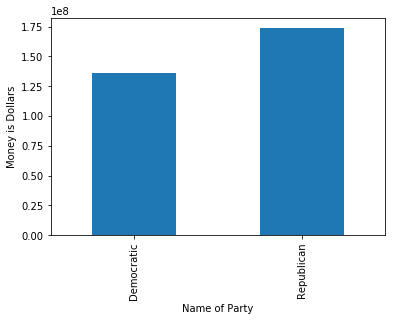

In [50]:
dd.groupby('Party')['contb_receipt_amt'].sum().plot(kind='bar')
plt.xlabel('Name of Party')
plt.ylabel('Money is Dollars')
plt.ioff()

We can see that even though Obama got highest contribution amoung candidates Republican party got more contribution that Democratic party.This could be because Republic Party has many candidates for the Presidential Elections 

In [51]:
occupation_dd=dd.pivot_table('contb_receipt_amt',index='contbr_occupation',columns='Party',aggfunc='sum')
occupation_dd.head()

Party,Democratic,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN


In [52]:
occupation_dd.shape

(45067, 2)

In [53]:
occupation_dd=occupation_dd[occupation_dd.sum(1)>1000000]

In [54]:
occupation_dd.shape

(31, 2)

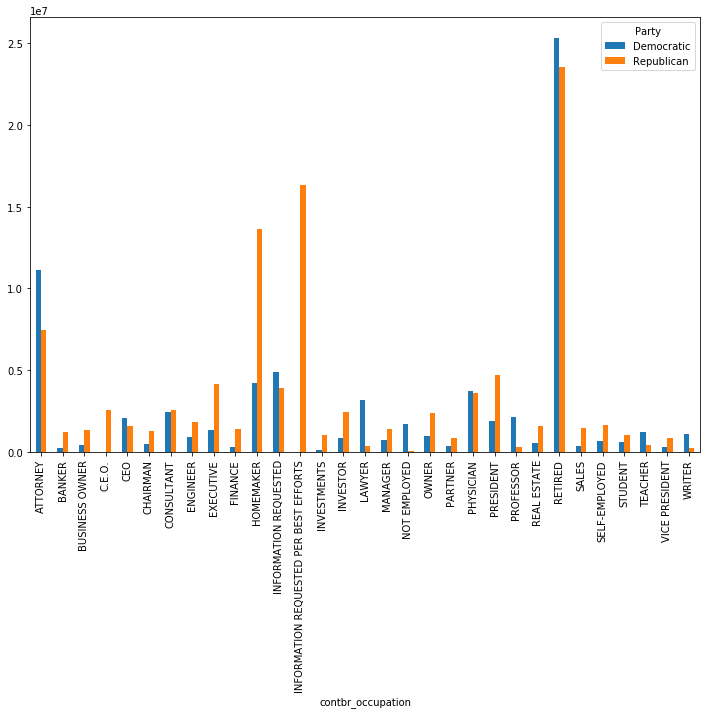

In [55]:
occupation_dd.plot(kind='bar',figsize=(12,8))
plt.ioff()

Retired peope,homemaker and Attorney make Highest contribution to Election Fund

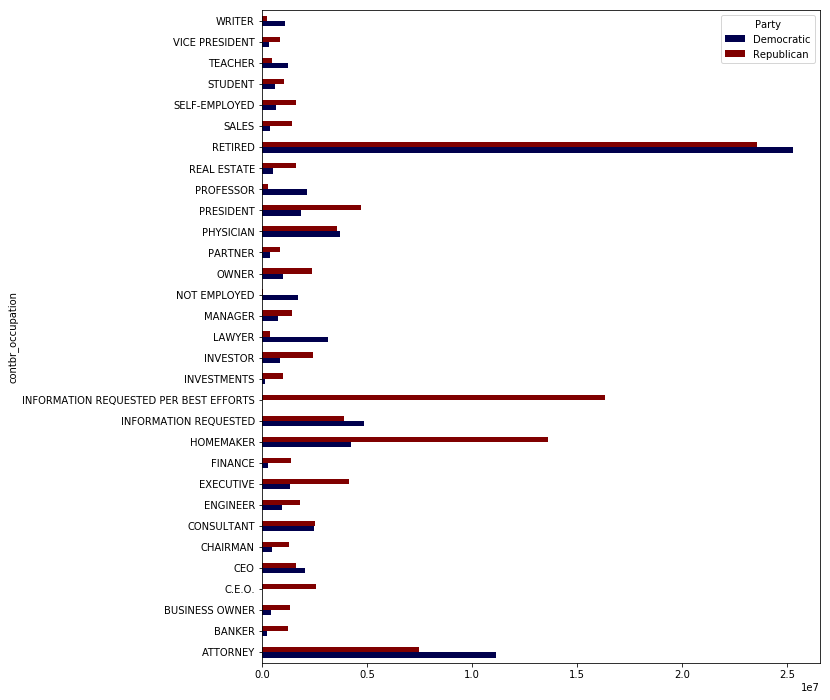

In [56]:
occupation_dd.plot(kind='barh',figsize=(10,12),cmap='seismic')
plt.ioff()

In [57]:
occupation_dd.drop(["INFORMATION REQUESTED PER BEST EFFORTS","INFORMATION REQUESTED"],axis=0,inplace=True)

In [58]:
occupation_dd.loc['CEO']=occupation_dd.loc['CEO']+occupation_dd.loc['C.E.O.']
occupation_dd.drop('C.E.O.',inplace=True)

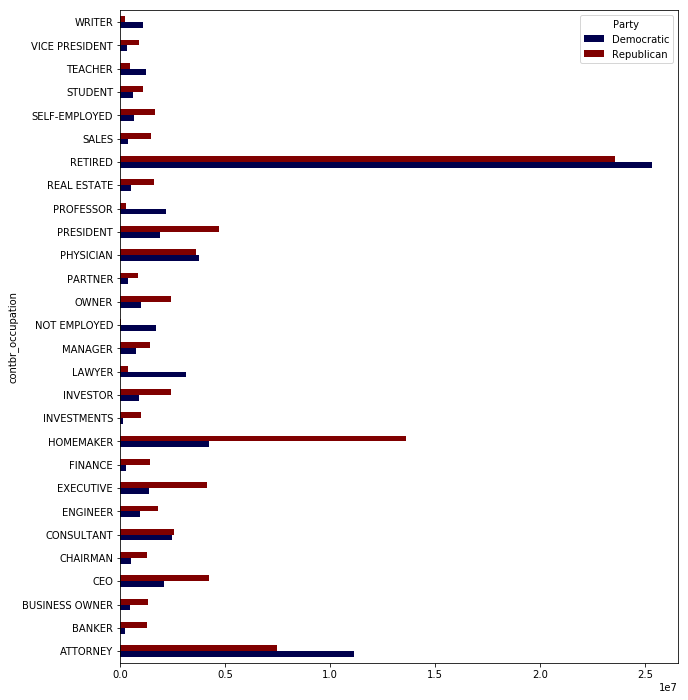

In [59]:
occupation_dd.plot(kind='barh',figsize=(10,12),cmap='seismic')
plt.ioff()

Retired peope,homemaker and Attorney make Highest contribution to Election Fund